What is the flux accuracy and flux uncertianty accuracy of the technqiue used by Michael Rowan Robinson in his Herschel papers?

In [1]:
import numpy as np
import pylab as plt
import seaborn as sns
from astropy.table import Table
%matplotlib inline

## Import blind catalogues

In [2]:
plw=Table.read('./mincorr_0.7_backbox150_SF_Cat_cosmos_itermap_lacey_07012015_simulated_observation_w_noise_PLW_hipe.fits.gz')
pmw=Table.read('./mincorr_0.7_backbox150_SF_Cat_cosmos_itermap_lacey_07012015_simulated_observation_w_noise_PMW_hipe.fits.gz')
psw=Table.read('./mincorr_0.7_backbox150_SF_Cat_cosmos_itermap_lacey_07012015_simulated_observation_w_noise_PSW_hipe.fits.gz')



The MRR technique:
* Select 5$\sigma$ sources (including contribution from confusion noise ~6.8mJy/beam
OR
* sources with flux greater than 25mJy (MRR2017)

In [15]:
plw[0:10]

RA,DEC,FLUX,FLUXERR,CORR,X,Y,SIGX,SIGY
float32,float32,float32,float32,float32,float32,float32,float32,float32
150.427,2.61908,0.0858719,0.00200483,0.982369,254.117,479.222,0.0406352,0.0396189
150.806,2.49789,0.0760896,0.00258191,0.958285,140.509,442.907,0.0518561,0.0383025
149.892,2.00003,0.0721438,0.00201194,0.948147,414.304,293.5,0.0492691,0.048861
150.316,2.65611,0.0578267,0.00205716,0.971835,287.288,490.326,0.0596986,0.0619172
150.982,1.94776,0.0576362,0.00204137,0.95536,87.623,277.88,0.060865,0.0611889
149.785,2.80712,0.0569866,0.00205695,0.961855,446.401,535.644,0.0605495,0.0610225
149.139,2.50615,0.0567981,0.00188236,0.951941,640.124,445.442,0.0587745,0.058316
149.548,2.48835,0.0558865,0.00201265,0.883481,517.592,440.029,0.0613549,0.0611473
150.386,3.31766,0.0554299,0.00436234,0.819345,266.456,688.836,0.134475,0.141967


In [4]:
ind=plw['FLUX']/np.power(plw['FLUXERR']**2+0.0068**2, 0.5)>5
ind=plw['FLUX']>0.025

ind_pmw=pmw['FLUX']/np.power(pmw['FLUXERR']**2+0.0063**2, 0.5)>5


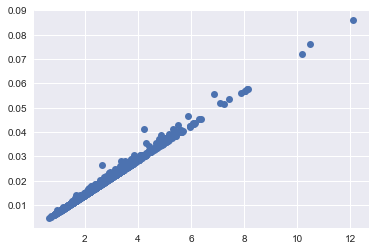

In [5]:
plt.plot(plw['FLUX']/np.power(plw['FLUXERR']**2+0.0068**2, 0.5),plw['FLUX'],'o')

# Cross match with 350 $\mathrm{\mu m}$ 

In [6]:
from astropy.coordinates import SkyCoord
from astropy import units as u
c = SkyCoord(ra=plw['RA'][ind]*u.degree, dec=plw['DEC'][ind]*u.degree)  
catalog = SkyCoord(ra=pmw['RA'][ind_pmw]*u.degree, dec=pmw['DEC'][ind_pmw]*u.degree)  
idx, d2d, d3d = c.match_to_catalog_sky(catalog) 

In [7]:
ind_good=d2d<30.0*u.arcsec

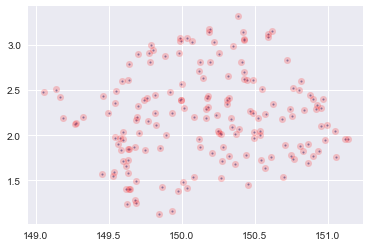

In [8]:
plt.plot(plw['RA'][ind][ind_good]*u.degree,plw['DEC'][ind][ind_good]*u.degree,'o',alpha=0.8,ms=2)
plt.plot(pmw['RA'][ind_pmw][idx][ind_good]*u.degree,pmw['DEC'][ind_pmw][idx][ind_good]*u.degree, 'ro', alpha=0.2)

In [9]:
print(ind.sum(),ind_pmw.sum(),len(idx),len(d2d))

219 452 219 219


## Cross match with truth
* look for largest flux within 18 arcsec

In [10]:
truth=Table.read('/Users/pdh21/Work/Astro/XID_plus/test_files/lacey_07012015_MillGas.ALLVOLS_cat_PSW_COSMOS_test.fits')

In [11]:
truth

DHALOID,GALAXYID,S100,S160,S250,S350,S500,APPUSO_TOT_EXT,APPGSO_TOT_EXT,APPRSO_TOT_EXT,APPISO_TOT_EXT,APPZSO_TOT_EXT,DEC,IS_CENTRAL,MHHALO,MSTARDOT,MSTARS_TOT,RA,Z_COS,Z_OBS
str22,str22,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float32,float32,float32,float32,float64,float32,float32
7221000005,250660000005,0.184557,0.847295,1.00324,0.666443,0.30983,21.0851,19.9199,19.3745,19.1446,18.9669,2.52281435887,0.0,1.12367e+11,8.41508e+07,1.02091e+09,149.968831368,0.102633,0.100918
7354000005,252230000005,0.879098,2.2013,1.80466,0.997061,0.40618,20.3638,19.3247,18.8853,18.698,18.5506,1.09296587368,0.0,1.81679e+11,1.88512e+08,1.15188e+09,149.996199092,0.092121,0.0912445
4026000013,210160000013,0.0112136,0.0411177,0.0405248,0.0241011,0.0102681,25.039,23.1625,21.7082,21.1741,20.85,2.10696062174,0.0,2.84672e+11,2.00169e+06,6.09953e+09,149.137297107,0.376282,0.376532
4726000013,219730000013,0.0652038,0.208996,0.191553,0.110243,0.0459506,23.3759,22.8123,21.79,21.5169,21.3217,2.56423522875,0.0,2.80937e+11,3.34448e+08,1.60865e+09,150.92582623,0.376829,0.377374
5536000013,230270000013,0.103659,0.455567,0.496569,0.309403,0.13604,22.8201,22.3489,21.3669,21.1046,20.9246,2.16826441305,0.0,1.81664e+11,5.8204e+08,2.28481e+09,149.524681469,0.377186,0.377635
5762000013,233190000013,0.136709,0.615261,0.677913,0.424214,0.187012,22.8012,22.2651,21.2245,20.9151,20.6908,1.88389672817,0.0,1.76046e+11,6.97228e+08,3.16073e+09,149.729887985,0.383715,0.3851
9150000013,272530000013,0.0201797,0.105251,0.130986,0.0878964,0.0408579,23.9817,23.5002,22.5123,22.2561,22.0729,2.41002832928,0.0,8.80211e+10,1.92794e+08,7.69563e+08,149.891553543,0.381552,0.382695
4424000012,215640000012,0.0270184,0.146568,0.192646,0.136105,0.0665875,23.3157,22.8147,22.039,21.8566,21.7233,1.40785718228,0.0,1.55454e+11,2.51134e+08,6.29514e+08,150.436258903,0.327132,0.325931
24026571,1840000011,39.481,67.4472,45.2025,23.0549,8.96614,23.275,21.9669,20.7596,20.2263,19.9311,2.15883520338,0.0,2.30369e+11,5.59299e+09,2.42265e+10,149.563597856,0.292259,0.293412


In [12]:
c = SkyCoord(ra=plw['RA'][ind][ind_good]*u.degree, dec=plw['DEC'][ind][ind_good]*u.degree)
truth_catalog = SkyCoord(ra=truth['RA']*u.degree, dec=truth['DEC']*u.degree)  


In [13]:
t500=np.empty((ind_good.sum()))
t350=np.empty((ind_good.sum()))

for i in range(0,ind_good.sum()):
    d2d=c[i].separation(truth_catalog)
    t500[i]=np.max(truth['S500'][d2d<30*u.arcsec])
    t350[i]=truth['S350'][d2d<30*u.arcsec][np.argmax(truth['S500'][d2d<30*u.arcsec])]
    #t300=np.max(truth['S300'][d2d<30*u.arcsec])
    #t300=np.max(truth['S300'][d2d<30*u.arcsec])

    

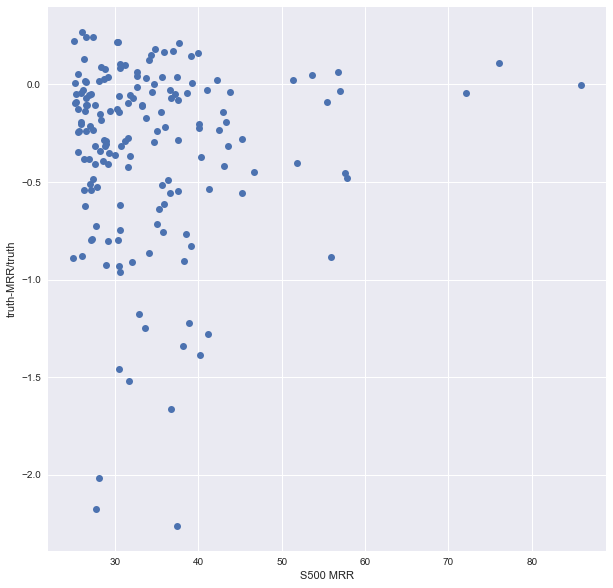

In [14]:
plt.figure(figsize=(10,10))
plt.plot(1000.0*plw['FLUX'][ind][ind_good],(t500-1000.0*plw['FLUX'][ind][ind_good])/t500,'o')
plt.xlabel('S500 MRR')
plt.ylabel('truth-MRR/truth')

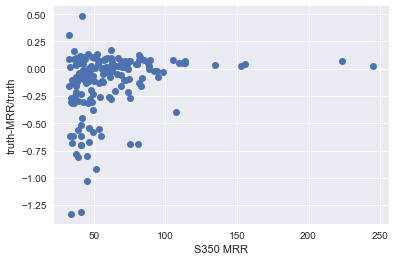

In [77]:
plt.plot(1000.0*pmw['FLUX'][ind_pmw][idx][ind_good],(t350-1000.0*pmw['FLUX'][ind_pmw][idx][ind_good])/t350,'o')
plt.xlabel('S350 MRR')
plt.ylabel('truth-MRR/truth')

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   1.,   0.,
          0.,   0.,   1.,   1.,   1.,   2.,   3.,   1.,   0.,   5.,   6.,
          8.,   4.,   9.,  10.,  14.,  18.,  17.,  25.,  22.,  10.,   7.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.]),
 array([-300, -290, -280, -270, -260, -250, -240, -230, -220, -210, -200,
        -190, -180, -170, -160, -150, -140, -130, -120, -110, -100,  -90,
         -80,  -70,  -60,  -50,  -40,  -30,  -20,  -10,    0,   10,   20,
          30,   40,   50,   60,   70,   80,   90,  100,  110,  120,  130,
         140,  150,  160,  170,  180,  190,  200,  210,  220,  230,  240,
         250,  260,  270,  280,  290]),
 <a list of 59 Patch objects>)

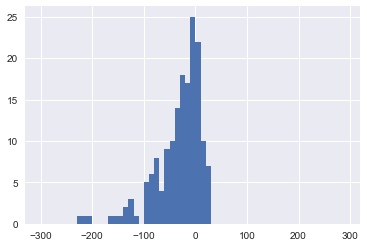

In [69]:
plt.hist(100.0*(t500-1000.0*plw['FLUX'][ind][ind_good])/t500, bins=np.arange(-300,300,10))

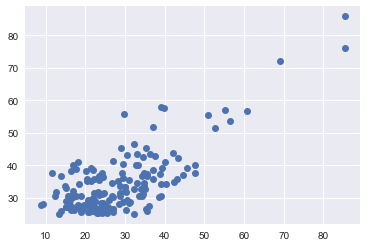

In [78]:
plt.plot(t500,1000.0*plw['FLUX'][ind][ind_good],'o')

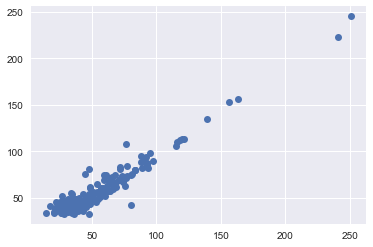

In [80]:
plt.plot(t350,1000.0*pmw['FLUX'][ind_pmw][idx][ind_good], 'o')